In [6]:
!pip install fbprophet
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=386ab00b0b55d20ddbd14ccb382fe16fe4778e32648fa52ec7cbbe5a939af3c4
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


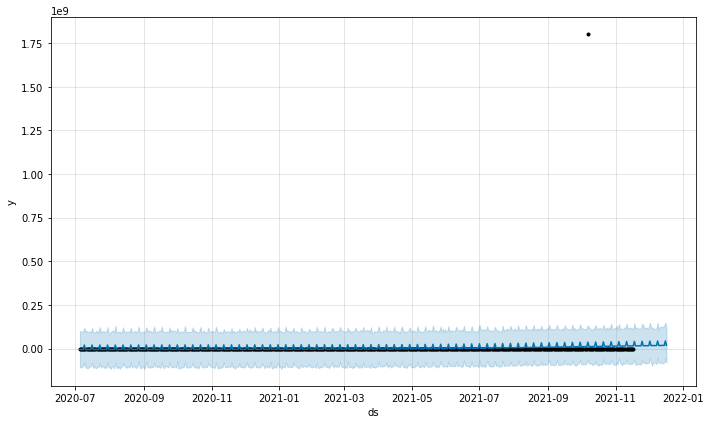

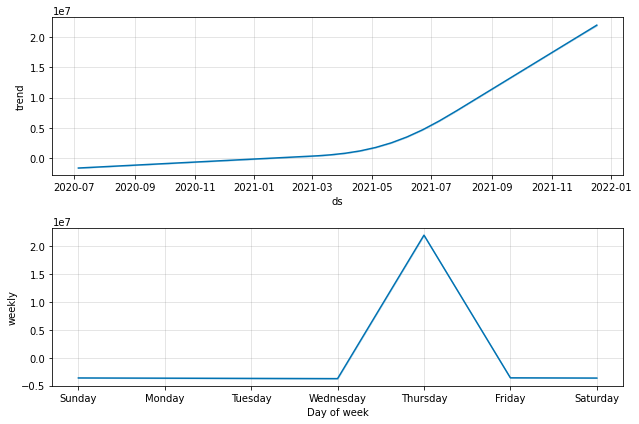

In [14]:
import json
import datetime
import numpy as np
from fbprophet import Prophet
import pandas as pd
import requests
import import_ipynb
import keras_preprocessing as pre
import matplotlib.pyplot as plt
from fbprophet.plot import plot_cross_validation_metric
import math
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=USDT&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'
hist.head(5)
hist['y']=(hist['high']+hist['low'])/2
hist['ds']=hist.index
model = Prophet()
model.fit(hist);
future = model.make_future_dataframe(periods=30)
#forecasting for 1 year from now.
forecast = model.predict(future)
figure=model.plot(forecast)
fig2 = model.plot_components(forecast)